In [257]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from datetime import datetime
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors


In [258]:
# Decrease the size of the image for faster processing - but losing some details
DOWNSCALE_WIDTH = 300
DOWNSCALE_HEIGHT = 200

In [259]:
image = cv2.imread('data/2024-06-16/2024-06-16-08/2024-06-16-08-46.jpg', cv2.IMREAD_GRAYSCALE)
compared_to_image = cv2.imread('data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg', cv2.IMREAD_GRAYSCALE)

## Create diff of image

In [260]:
def diff_to_color_gradient_filter(img1, img2, threshold=0):
    # Calculate the difference
    diff = img2.astype(int) - img1.astype(int)

    # Create an empty color image
    color_img = np.zeros((*img1.shape, 3), dtype=np.uint8)

    # Set the red channel to the positive differences above the threshold
    color_img[(diff > threshold), 0] = diff[diff > threshold]

    # Set the green channel to the negative differences below the negative threshold
    color_img[(diff < -threshold), 1] = -diff[diff < -threshold]

    # Set the blue channel to the zero differences and differences within the threshold
    color_img[(diff == 0) | ((diff > -threshold) & (diff < threshold)), 2] = 0

    return color_img

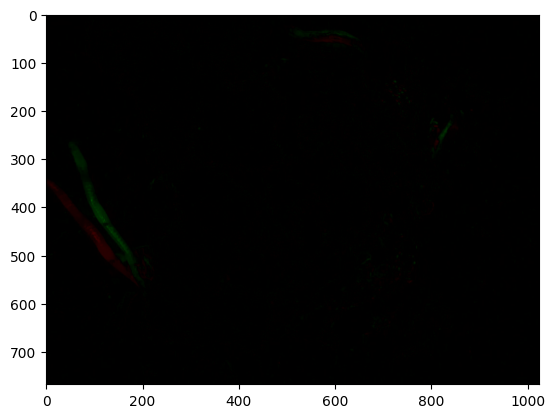

In [261]:
diff_img = diff_to_color_gradient_filter(image, compared_to_image, threshold=0)

plt.imshow(diff_img)
plt.show()

## Create heatmap of image

In [262]:
def heatmap(diff, cmap='hot', title='Heatmap of Differences'):
    plt.imshow(diff, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Color Difference')
    plt.title(title)
    plt.show()

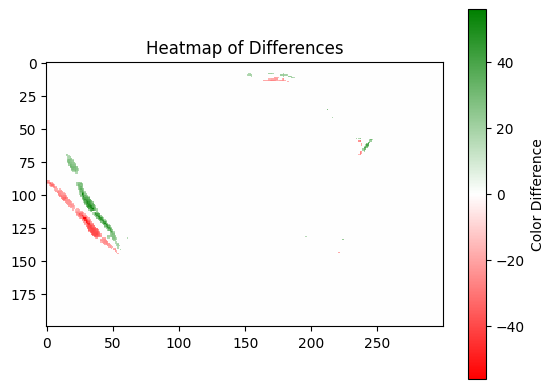

In [263]:
threshold = 15

# Downscale the images to a 3x2 grid
image_resized = cv2.resize(image, (300, 200), interpolation=cv2.INTER_AREA)
compared_to_image_resized = cv2.resize(compared_to_image, (300, 200), interpolation=cv2.INTER_AREA)

# Calculate the difference with a threshold of 10
diff = image_resized.astype(float) - compared_to_image_resized.astype(float)
diff = np.where(np.abs(diff) > threshold, diff, 0)

# Plot the heatmap
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_green", ["red", "white", "green"])
heatmap(diff, cmap=cmap)

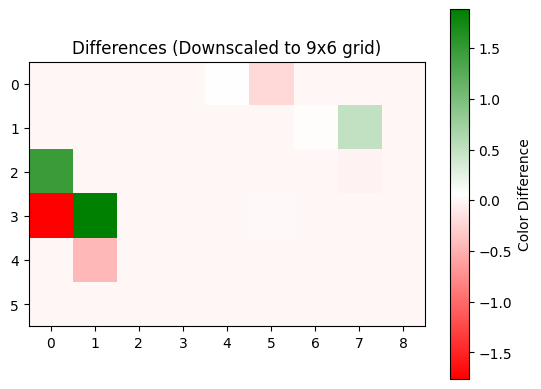

In [264]:
# Downscale the difference to a smaller grid
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_green", ["red", "white", "green"])
grid = (9, 6)
diff_resized = cv2.resize(diff, (9, 6), interpolation=cv2.INTER_AREA)
heatmap(diff_resized, cmap=cmap, title=f'Differences (Downscaled to {grid[0]}x{grid[1]} grid)')

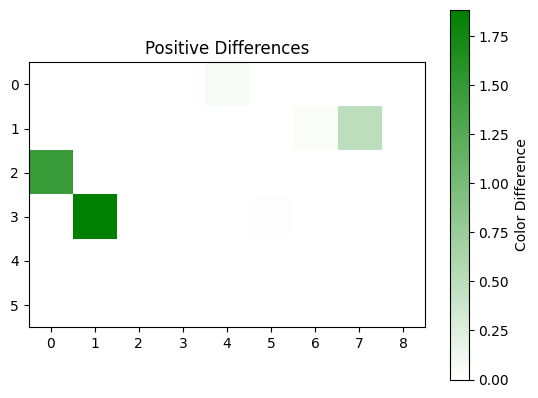

In [265]:
# Take only the positive values
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_green", ["white", "green"])
diff_positive = np.where(diff_resized > 0, diff_resized, 0)
heatmap(diff_positive, cmap=cmap, title='Positive Differences')

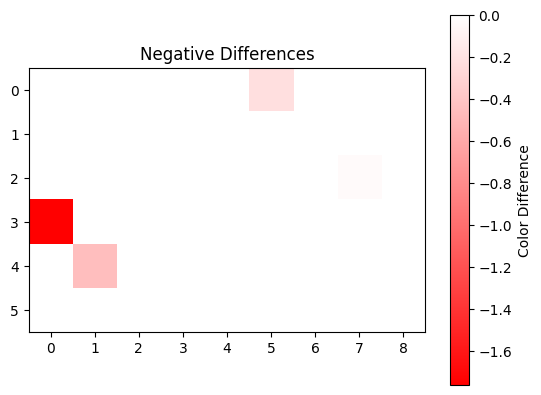

In [266]:
# Take only the negative values
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_red", ["red", "white"])
diff_positive = np.where(diff_resized < 0, diff_resized, 0)
heatmap(diff_positive, cmap=cmap, title='Negative Differences')

In [ ]:
# !!! Also add one that takes the absolute value of the differences from min to max
# !!! Try the above out on different images

# Apply diff over multiple images to find most active images

In [267]:
# Specify the directory where the images are located
folder = "2024-06-16"
image_dir = f"data/{folder}"

# Get a list of all image files in the directory and its subdirectories
image_files = glob.glob(os.path.join(image_dir, '**/*.jpg'), recursive=True) + glob.glob(os.path.join(image_dir, '**/*.png'), recursive=True)

# Sort the image files
image_files = sorted(image_files)

# Print the list of image files
print(image_files)

['data/2024-06-16/2024-06-16-06/2024-06-16-06-00.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-01.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-02.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-03.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-04.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-05.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-06.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-07.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-08.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-09.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-10.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-11.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-12.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-13.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-14.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-15.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-16.jpg', 'data/2024-06-16/2024-06-16-06/2024-06-16-06-17.jpg', 'data/2024-06-16/2024-06-16

In [268]:
def downscale_image(image, width=DOWNSCALE_WIDTH, height=DOWNSCALE_HEIGHT):
    # Get original image dimensions
    h, w = image.shape[:2]

    # Calculate aspect ratio
    aspect = w / h

    # Set width and height
    if width is not None:
        width = int(width)
        height = int(width / aspect)
    elif height is not None:
        height = int(height)
        width = int(height * aspect)
    else:
        raise ValueError("Width or height must be provided")

    # Resize the image
    resized_image = cv2.resize(image, (width, height))

    return resized_image

In [269]:
def calculate_mean_gray(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Calculate and return the mean gray value
    return np.mean(img)

In [270]:
mean_gray_values = [calculate_mean_gray(image_file) for image_file in image_files]
names = [os.path.basename(f) for f in image_files]
dates = [datetime.strptime(os.path.basename(f).split('.')[0], '%Y-%m-%d-%H-%M').isoformat() for f in image_files]

data = pd.DataFrame({
    'name': names,
    'date': dates,
    'mean_gray_value': mean_gray_values,
    'path': image_files
})

data = data.sort_values(by='name')

In [271]:
# Initialize lists to store the total red and green values and the compared_with values
total_red = []
total_green = []
compared_with = []
compared_with_path = []
heatmap = []

# Initialize a variable to store the previous image and its path
prev_img = None
prev_img_path = None

threshold = 20  # Set your threshold value here

# Iterate over the image paths
for img_path in image_files:
    # Read the current image as grayscale
    img = downscale_image(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE))

    # If there is a previous image, calculate the difference and the total red and green values
    if prev_img is not None:
        prev_img = downscale_image(cv2.imread(prev_img_path, cv2.IMREAD_GRAYSCALE))
        diff_color_img = diff_to_color_gradient_filter(img, prev_img, threshold=threshold)
        total_red.append(np.sum(diff_color_img[:,:,0]))
        total_green.append(np.sum(diff_color_img[:,:,1]))  # This will be the same as total_red for grayscale images
        compared_with.append(os.path.basename(prev_img_path))
        compared_with_path.append(prev_img_path)

        # store heatmap
        # img = downscale_image(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), 3, 2)
        # prev_img = downscale_image(cv2.imread(prev_img_path, cv2.IMREAD_GRAYSCALE), 3, 2)
        # color_gradient = diff_to_color_gradient_filter(img, prev_img, threshold=threshold)
        # color_gradient_flat = color_gradient.flatten()
        # heatmap.append(color_gradient_flat)

        # Assume `img1` and `img2` are your two images
        # Downsample the images to a 3x2 grid
        img1_resized = cv2.resize(img, (3, 2), interpolation=cv2.INTER_AREA)
        img2_resized = cv2.resize(prev_img, (3, 2), interpolation=cv2.INTER_AREA)
        color_shift = img2_resized.astype(int) - img1_resized.astype(int)
        color_shift_flat = color_shift.flatten()
        heatmap.append(pd.Series(color_shift_flat))
    else:
        # If there is no previous image, append None to the total red and green values and the compared_with values
        total_red.append(None)
        total_green.append(None)
        compared_with.append(None)
        compared_with_path.append(None)
        heatmap.append(None)
    
    # Update the previous image and its path
    prev_img = img
    prev_img_path = img_path

# Add the total red and green values and the compared_with values to the data as new columns
data['total_red'] = total_red
data['total_green'] = total_green
data['compared_with'] = compared_with
data['compared_with_path'] = compared_with_path
data['heatmap'] = heatmap

# Create a new column that is the sum of 'total_red' and 'total_green'
data['total_red_green'] = data['total_red'] + data['total_green']

# Sort the data by 'total_red_green' in descending order
data.sort_values(by='total_red_green', ascending=False, inplace=True)

## Check the shift of color values over time

In [272]:
# Red is decrease in reflection, green is increase, blue is no change


def diff_to_color_gradient(img1, img2):
    # Calculate the difference
    diff = img2.astype(int) - img1.astype(int)

    # Create an empty color image
    color_img = np.zeros((*img1.shape, 3), dtype=np.uint8)

    # Set the red channel to the positive differences
    color_img[diff > 0, 0] = diff[diff > 0]

    # Set the green channel to the negative differences
    color_img[diff < 0, 1] = -diff[diff < 0]

    # Set the blue channel to the zero differences
    color_img[diff == 0, 2] = 0

    return color_img


def diff_to_color(img1, img2, threshold=0):
    # Calculate the difference
    diff = img2.astype(int) - img1.astype(int)

    # Create an empty color image
    color_img = np.zeros((*img1.shape, 3), dtype=np.uint8)

    # Set the red channel to 255 (100% red) where the pixel value has decreased (darkened) below the negative threshold
    color_img[diff < -threshold, 1] = 255

    # Set the green channel to 255 (100% green) where the pixel value has increased above the threshold
    color_img[diff > threshold, 0] = 255

    # Set the blue channel to 255 (100% blue) for the zero differences and differences within the threshold
    color_img[(diff == 0) | ((diff > -threshold) & (diff < threshold)), 2] = 255

    return color_img

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 166 to 0
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                720 non-null    object 
 1   date                720 non-null    object 
 2   mean_gray_value     720 non-null    float64
 3   path                720 non-null    object 
 4   total_red           719 non-null    float64
 5   total_green         719 non-null    float64
 6   compared_with       719 non-null    object 
 7   compared_with_path  719 non-null    object 
 8   heatmap             719 non-null    object 
 9   total_red_green     719 non-null    float64
dtypes: float64(4), object(6)
memory usage: 61.9+ KB


In [274]:
data.head()

,name,date,mean_gray_value,path,total_red,total_green,compared_with,compared_with_path,heatmap,total_red_green
166,2024-06-16-08-46.jpg,2024-06-16T08:46:00,25.087828,data/2024-06-16/2024-06-16-08/2024-06-16-08-46.jpg,8241.0,10462.0,2024-06-16-08-45.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,18703.0
165,2024-06-16-08-45.jpg,2024-06-16T08:45:00,25.074253,data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg,4130.0,6781.0,2024-06-16-08-44.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-44.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,10911.0
164,2024-06-16-08-44.jpg,2024-06-16T08:44:00,25.027316,data/2024-06-16/2024-06-16-08/2024-06-16-08-44.jpg,1977.0,4986.0,2024-06-16-08-43.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-43.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,6963.0
187,2024-06-16-09-07.jpg,2024-06-16T09:07:00,24.877368,data/2024-06-16/2024-06-16-09/2024-06-16-09-07.jpg,3895.0,2231.0,2024-06-16-09-06.jpg,data/2024-06-16/2024-06-16-09/2024-06-16-09-06.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,6126.0
183,2024-06-16-09-03.jpg,2024-06-16T09:03:00,24.955346,data/2024-06-16/2024-06-16-09/2024-06-16-09-03.jpg,2285.0,3572.0,2024-06-16-09-02.jpg,data/2024-06-16/2024-06-16-09/2024-06-16-09-02.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,5857.0


In [275]:
cleaned_data = data.dropna()

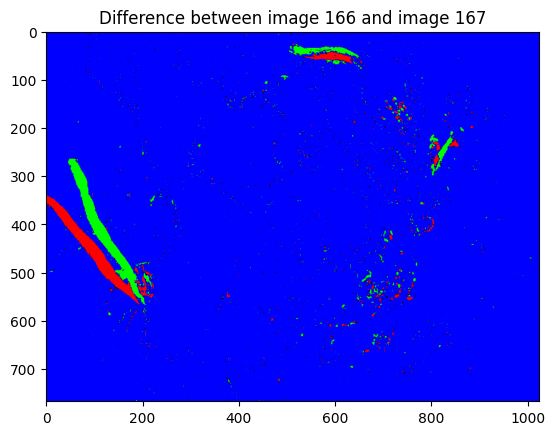

In [276]:
# Display each difference
for index, row in cleaned_data.head(1).iterrows():
    image = cv2.imread(row['path'], cv2.IMREAD_GRAYSCALE)
    compared_to_image = cv2.imread(row['compared_with_path'], cv2.IMREAD_GRAYSCALE)
    color_diff = diff_to_color(image, compared_to_image, threshold=5)
    # color_diff = diff_to_color_gradient_filter(image_before, image_after, threshold=0)
    plt.figure()
    plt.imshow(color_diff, cmap='gray')
    plt.title(f'Difference between image {index} and image {index+1}')
    plt.show()

In [277]:
data.head()

,name,date,mean_gray_value,path,total_red,total_green,compared_with,compared_with_path,heatmap,total_red_green
166,2024-06-16-08-46.jpg,2024-06-16T08:46:00,25.087828,data/2024-06-16/2024-06-16-08/2024-06-16-08-46.jpg,8241.0,10462.0,2024-06-16-08-45.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,18703.0
165,2024-06-16-08-45.jpg,2024-06-16T08:45:00,25.074253,data/2024-06-16/2024-06-16-08/2024-06-16-08-45.jpg,4130.0,6781.0,2024-06-16-08-44.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-44.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,10911.0
164,2024-06-16-08-44.jpg,2024-06-16T08:44:00,25.027316,data/2024-06-16/2024-06-16-08/2024-06-16-08-44.jpg,1977.0,4986.0,2024-06-16-08-43.jpg,data/2024-06-16/2024-06-16-08/2024-06-16-08-43.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,6963.0
187,2024-06-16-09-07.jpg,2024-06-16T09:07:00,24.877368,data/2024-06-16/2024-06-16-09/2024-06-16-09-07.jpg,3895.0,2231.0,2024-06-16-09-06.jpg,data/2024-06-16/2024-06-16-09/2024-06-16-09-06.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,6126.0
183,2024-06-16-09-03.jpg,2024-06-16T09:03:00,24.955346,data/2024-06-16/2024-06-16-09/2024-06-16-09-03.jpg,2285.0,3572.0,2024-06-16-09-02.jpg,data/2024-06-16/2024-06-16-09/2024-06-16-09-02.jpg,0 0 1 0 2 0 3 0 4 0 5 0 dtype: int64,5857.0


In [278]:
image_path = data.iloc[0]['path']
compared_to_image_path = data.iloc[0]['compared_with_path']

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
compared_to_image = cv2.imread(compared_to_image_path, cv2.IMREAD_GRAYSCALE)

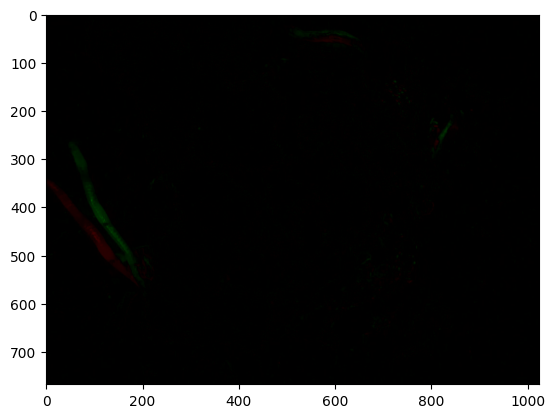

In [279]:
diff_img = diff_to_color_gradient_filter(image, compared_to_image, threshold=0)

plt.imshow(diff_img)
plt.show()

1006008


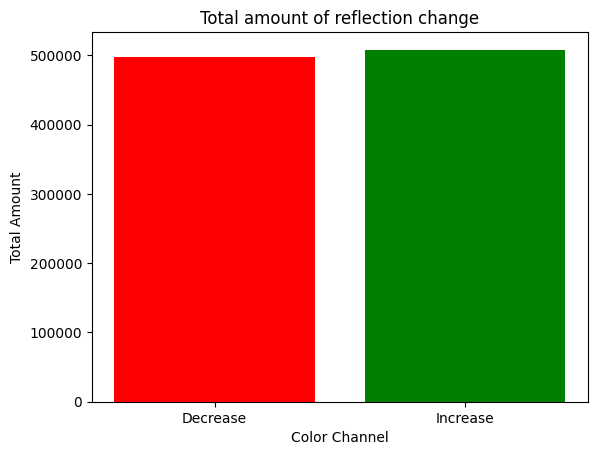

In [280]:
# Calculate the total amount of each color channel
total_red = np.sum(diff_img[:, :, 0])
total_green = np.sum(diff_img[:, :, 1])

print(total_red + total_green)

# Plot the total amounts
plt.bar(['Decrease', 'Increase'], [total_red, total_green], color=['red', 'green'])
plt.title('Total amount of reflection change')
plt.xlabel('Color Channel')
plt.ylabel('Total Amount')
plt.show()